# 第7回演習「論理回路を学習させる」

この演習では、勾配法によるニューラルネットワークの学習を習得します。<hr />

初期状態の「中間層への」重み
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]]
初期状態の「出力層への」重み
 [[0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]]
学習する前のネットワークの出力
[0 0] [0.41331644 0.58668356]
[0 1] [0.42068526 0.57931474]
[1 0] [0.41488198 0.58511802]
[1 1] [0.4230695 0.5769305]
-------------
i= 500 0.4471454793631319
-------------
i= 1000 0.17195573182803361
-------------
i= 1500 0.031407099624446044
-------------
i= 2000 0.013086211058787446
-------------
i= 2500 0.007721031722917419
--

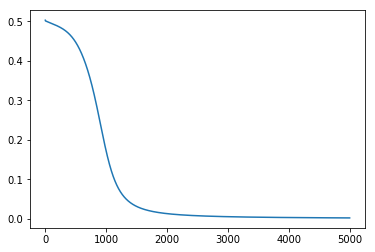

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

中間層への重み = []
出力層への重み = []
誤差の記録用 = []

入力の行列 = np.array([[0,0],[0,1],[1,0],[1,1]])  

# 正解の行列 = np.array([[0,1],[0,1],[0,1],[1,0]])  #ANDの時の確率
# 正解の行列 = np.array([[0,1],[1,0],[1,0],[1,0]])  #ORの時の確率
# 正解の行列 = np.array([[1,0],[1,0],[1,0],[0,1]])  #NANDの時の確率
正解の行列 = np.array([[1,0],[0,1],[0,1],[1,0]])  #XORの時の確率

繰り返し数 = 5000
学習率 = 0.2 # 勾配法の学習率

def ネットワーク初期化(入力層ノード数, 中間層ノード数, 出力層ノード数):
    global 中間層への重み,出力層への重み
    np.random.seed(0) # 乱数の種
    中間層への重み = np.random.rand(入力層ノード数+1,中間層ノード数) # 重みをランダムに決定
    出力層への重み = np.random.rand(中間層ノード数+1,出力層ノード数)# 重みをランダムに決定

def 損失関数(入力,正解):
    出力 = 入力から出力までを計算(入力,中間層への重み,出力層への重み)
    行列の要素数 = 出力.shape[0] # 行数x列数
    return(np.sum(np.power(出力-正解,2))/行列の要素数) # 平均二乗誤差を返す

def 数値微分(関数, 現在地):
    微小な変化 = 0.01
    勾配 = np.zeros_like(現在地) # まずゼロ埋め
    繰り返し = np.nditer(現在地, flags=['multi_index']) # 行列の全要素にアクセス
    while not 繰り返し.finished: # アクセス完了まで
        i = 繰り返し.multi_index # インデックス番号を取得(0,0のように)
        一時的な値 = 現在地[i]
        現在地[i] = 一時的な値 + 微小な変化
        微小に増やした時の関数の値 = 関数(現在地)               
        現在地[i] = 一時的な値 - 微小な変化
        微小に減らした時の関数の値 = 関数(現在地)        

        勾配[i] = (微小に増やした時の関数の値-微小に減らした時の関数の値)/(2*微小な変化) # 傾き
        現在地[i] = 一時的な値 # 増減させる前に戻す
        繰り返し.iternext()   # 次の繰り返しへ
    return 勾配
 
def シグモイド関数(x): # 中間層での活性化関数
    return 1/(1+np.exp(-x))    
 
def ソフトマックス関数(x): # 出力層からの出力を確率に変換する時に使う
    exp_x = np.exp(x)
    return exp_x / np.sum(np.exp(x), axis=1, keepdims=True)

def 入力から出力までを計算(x,中間層への重み,出力層への重み): 
    入力層の値 = np.insert(x,0,1,axis=1) # バイアスニューロンを加え、入力層の各ノードの値とする
    中間層の仮の値 = np.dot(入力層の値,中間層への重み) # 重みを掛けて合計
    中間層の値 = シグモイド関数(中間層の仮の値) # 活性化関数を適用し中間層の各ノードの値とする
    中間層の値 = np.insert(中間層の値,0,1,axis=1) # バイアスニューロンも加え、中間層の各ノードの値とする
    出力層の仮の値 = np.dot(中間層の値,出力層への重み) # 重みを掛けて合計
    出力層の値 = ソフトマックス関数(出力層の仮の値) # 出力は確率とする
    return 出力層の値

############### これよりメインの処理 ###############

ネットワーク初期化(入力層ノード数=2, 中間層ノード数=10, 出力層ノード数=2)

print("初期状態の「中間層への」重み\n",中間層への重み)
print("初期状態の「出力層への」重み\n",出力層への重み)
 
print("学習する前のネットワークの出力")
学習する前の出力 = 入力から出力までを計算(入力の行列,中間層への重み,出力層への重み)
入力の行列の行数 = 入力の行列.shape[0]

for i in range(入力の行列の行数):
    print(入力の行列[i],学習する前の出力[i])

############### 学習開始 ###############
    
for i in range(繰り返し数):
    無名の損失関数 = lambda 重み: 損失関数(入力の行列,正解の行列)    

    中間層への重みの勾配=数値微分(無名の損失関数,中間層への重み)
    出力層への重みの勾配=数値微分(無名の損失関数,出力層への重み)
    
    中間層への重み -= 学習率 * 中間層への重みの勾配 # 重みを更新
    出力層への重み -= 学習率 * 出力層への重みの勾配 # 重みを更新     
    
    損失関数の値=損失関数(入力の行列,正解の行列)
    誤差の記録用.append(損失関数の値)    
    
    if (((i+1) % 500) == 0):
        print("-------------")
        print("i=",i+1,損失関数の値)

############### 学習終了 ###############

print("-------------") 
print("学習後のネットワークの出力")
学習後の出力 = 入力から出力までを計算(入力の行列,中間層への重み,出力層への重み)

for i in range(入力の行列の行数):
    print(入力の行列[i],学習後の出力[i])

################ 誤差が減っていく過程を図示 ################
x = np.arange(0,繰り返し数,1)
plt.plot(x,誤差の記録用)
plt.show()       

## 任意課題(1)

上のプログラムでは AND の学習の経過と結果を出力しました。<br />
この出力を見たうえで、OR、NAND、XOR も試してください。<br />
XORについては「正解の行列」の変数を自力で作ってください。

## 任意課題(2)

誤差関数の値が下がっていく様子を図示してください。<br />
ANDでもORでもNANDでもXORでも、どれを選んでも構いません。


## 任意課題(3)

XOR の学習に関して、中間層のノード数が「2の場合」と「10の場合」を試してみましょう。<br />
誤差関数のグラフの出力結果は「2の場合」と「10の場合」で、何か違いが見られるでしょうか?


ここまでで、第7回第4章は終了です。お疲れさまでした。 